---
---

# <center><font color='black'>Bayesian Inference: Worked Examples</font></center> <a class="tocSkip">
    
### <center><font color='black'>Nicolai Haug</font></center> <a class="tocSkip">
    
### <center><font color='black'>2021</font></center> <a class="tocSkip">
    
---
---

# Table of Contents <a class="tocSkip">

* [Introduction](#introduction)
    * [Configure Notebook](#configure) 
* [Single Parameter Inference](#single) 
    * [The Coin-flipping Problem](#coin)
        * [Choosing the Likelihood](#coinlikelihood)
        * [Choosing the Prior](#coinprior)
        * [Getting the Posterior](#coinposterior)
* [References](#references)

# Introduction <a name="introduction"></a>

In the following we develop some problem formulations to apply Bayesian analysis on for parameter inference.

We will focus on situations where closed forms are available. Such models are sometimes unrealistic, but their analysis often provides a useful starting point when it comes to constructing more realistic models. The standard distributions – binomial, normal, Poisson and exponential – have natural derivations from simple probability models. 

The binomial distribution is motivated from counting exchangeable outcomes, and the normal distribution applies to a random variable that is the sum of many exchangeable or independent terms. We will also have occasion to apply the normal distribution to the logarithm of all-positive data, which would naturally apply to observations that are modeled as the product of many independent multiplicative factors. The Poisson and exponential distributions arise as the number of counts and the waiting times, respectively, for events modeled as occurring exchangeably in all time intervals; that is, independently in time, with a constant rate of occurrence. Each of these standard models has an associated family of conjugate prior distributions, which we discuss in turn. 


These problems will later serve as both toy examples and benchmark problems for the likelihood-free methods.  

## Configure Notebook <a name="configure"></a>

<div class="alert alert-block alert-info" style="background-color: white; border: 2px solid; padding: 10px">
    <b><i class="fa fa-exclamation-circle" aria-hidden="true"></i>&nbsp; Important</b><br>
    <p style="color: black">
        Run the cell below to configure the notebook. 
    </p>
<div>
</div>
</div>

In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

from IPython.display import display
from latex_envs.latex_envs import figcaption 
from matplotlib import cm
from matplotlib import gridspec
from matplotlib.ticker import FormatStrFormatter, LinearLocator
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import default_rng

import warnings
# Comment this to turn on warnings
warnings.filterwarnings('ignore')

#plt.style.use('seaborn')
sns.set()
sns.set_context("paper")
sns.set_style("darkgrid", {"axes.facecolor": "0.96"})

# Set fontsizes in figures
params = {'legend.fontsize': 'large',
          'axes.labelsize': 'large',
          'axes.titlesize': 'large',
          'xtick.labelsize': 'large',
          'ytick.labelsize': 'large',
          'legend.fontsize': 'large',
          #'legend.handlelength': 2
         }
plt.rcParams.update(params)
plt.rc('text', usetex=True)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

In [2]:
# Set path to save the figures
FIGURE_PATH = "./../../latex/figures"

def fig_path(fig_id):
    """
    Input name of figure to load or save with extension as dtype str
    """
    return os.path.join(FIGURE_PATH + "/", fig_id)

# fig.savefig(fig_path('filename.pdf'))

# Single Parameter Inference <a name="single"></a>

## The Coin-flipping Problem <a name="coin"></a>

The following is based on the problem formulation found in [[1, Ch. 1]](#references).

The coin flipping problem, or the beta-binomial model, is a classical problem in statistics and goes like this: 

> We toss a coin a number of times and record how many heads and tails we get. Based on this data, we try to answer questions such as, *is the coin fair*? Or, more generally, *how biased is the coin*? 

In order to estimate the bias of a coin in a Bayesian setting, we will need data and a probabilistic model. For this example, we assume that we have already tossed a coin a number of times and recorded the number of observed heads, so the data-gathering part is already done.

We first generalize the concept of bias. To represent the bias, we will use the $\theta$ parameter. We will say that a coin with $\theta = 1$ will always land heads, one with $\theta=0$ always tails, and one with $\theta=0.5$ will land half of the time heads and the other half tails. We let $y$ represent the total number of heads for a $n$ number of tosses. 

### Choosing the Likelihood <a name="coinlikelihood"></a>

Let's assume that only two outcomes are possible – heads or tails. Furthermore, we assume that the coin tosses are independent of each other (one toss does not affect another) and that all coin tosses come from the same distribution. Thus is the random variable *coin toss* an example of an **independent and identically distributed (i.i.d.)** variable. Given these assumptions, a good candidate for the likelihood is the **binomial distribution**: 

<div class="alert alert-block alert-info" style="background-color: white; border: 2px solid; padding: 10px">
    <b><i class="fa fa-pencil" aria-hidden="true"></i>&nbsp; The Binomial Distribution</b><br>
<div>

\begin{equation}
    p (y \mid \theta, n) = \binom{n}{y} \theta^y (1 - \theta)^{n-y} = \frac{n!}{y!(n-y)}\theta^y (1 - \theta)^{n-y},
\end{equation} 
    
This is a discrete distribution returning the probability of getting $y$ heads (or in general, successes) out of $n$ coin tosses (or in general, trials or experiments) given a fixed value of $\theta$ (probability of success). 

<b>Mean and Standard Deviation of Binomial Distributions</b>
    
The mean of a binomial distribution with parameters $n$ and $\theta$ is: 

\begin{equation}
    \mu = n \theta,
\end{equation} 
    
and the variance is: 

\begin{equation}
    \sigma^2 = n \theta (1 - \theta)
\end{equation}
    
Naturally, the standard deviation is the square root of the variance: 
    
\begin{equation}
    \sigma = \sqrt{n \theta (1 - \theta)}
\end{equation}
    
</div>
</div>

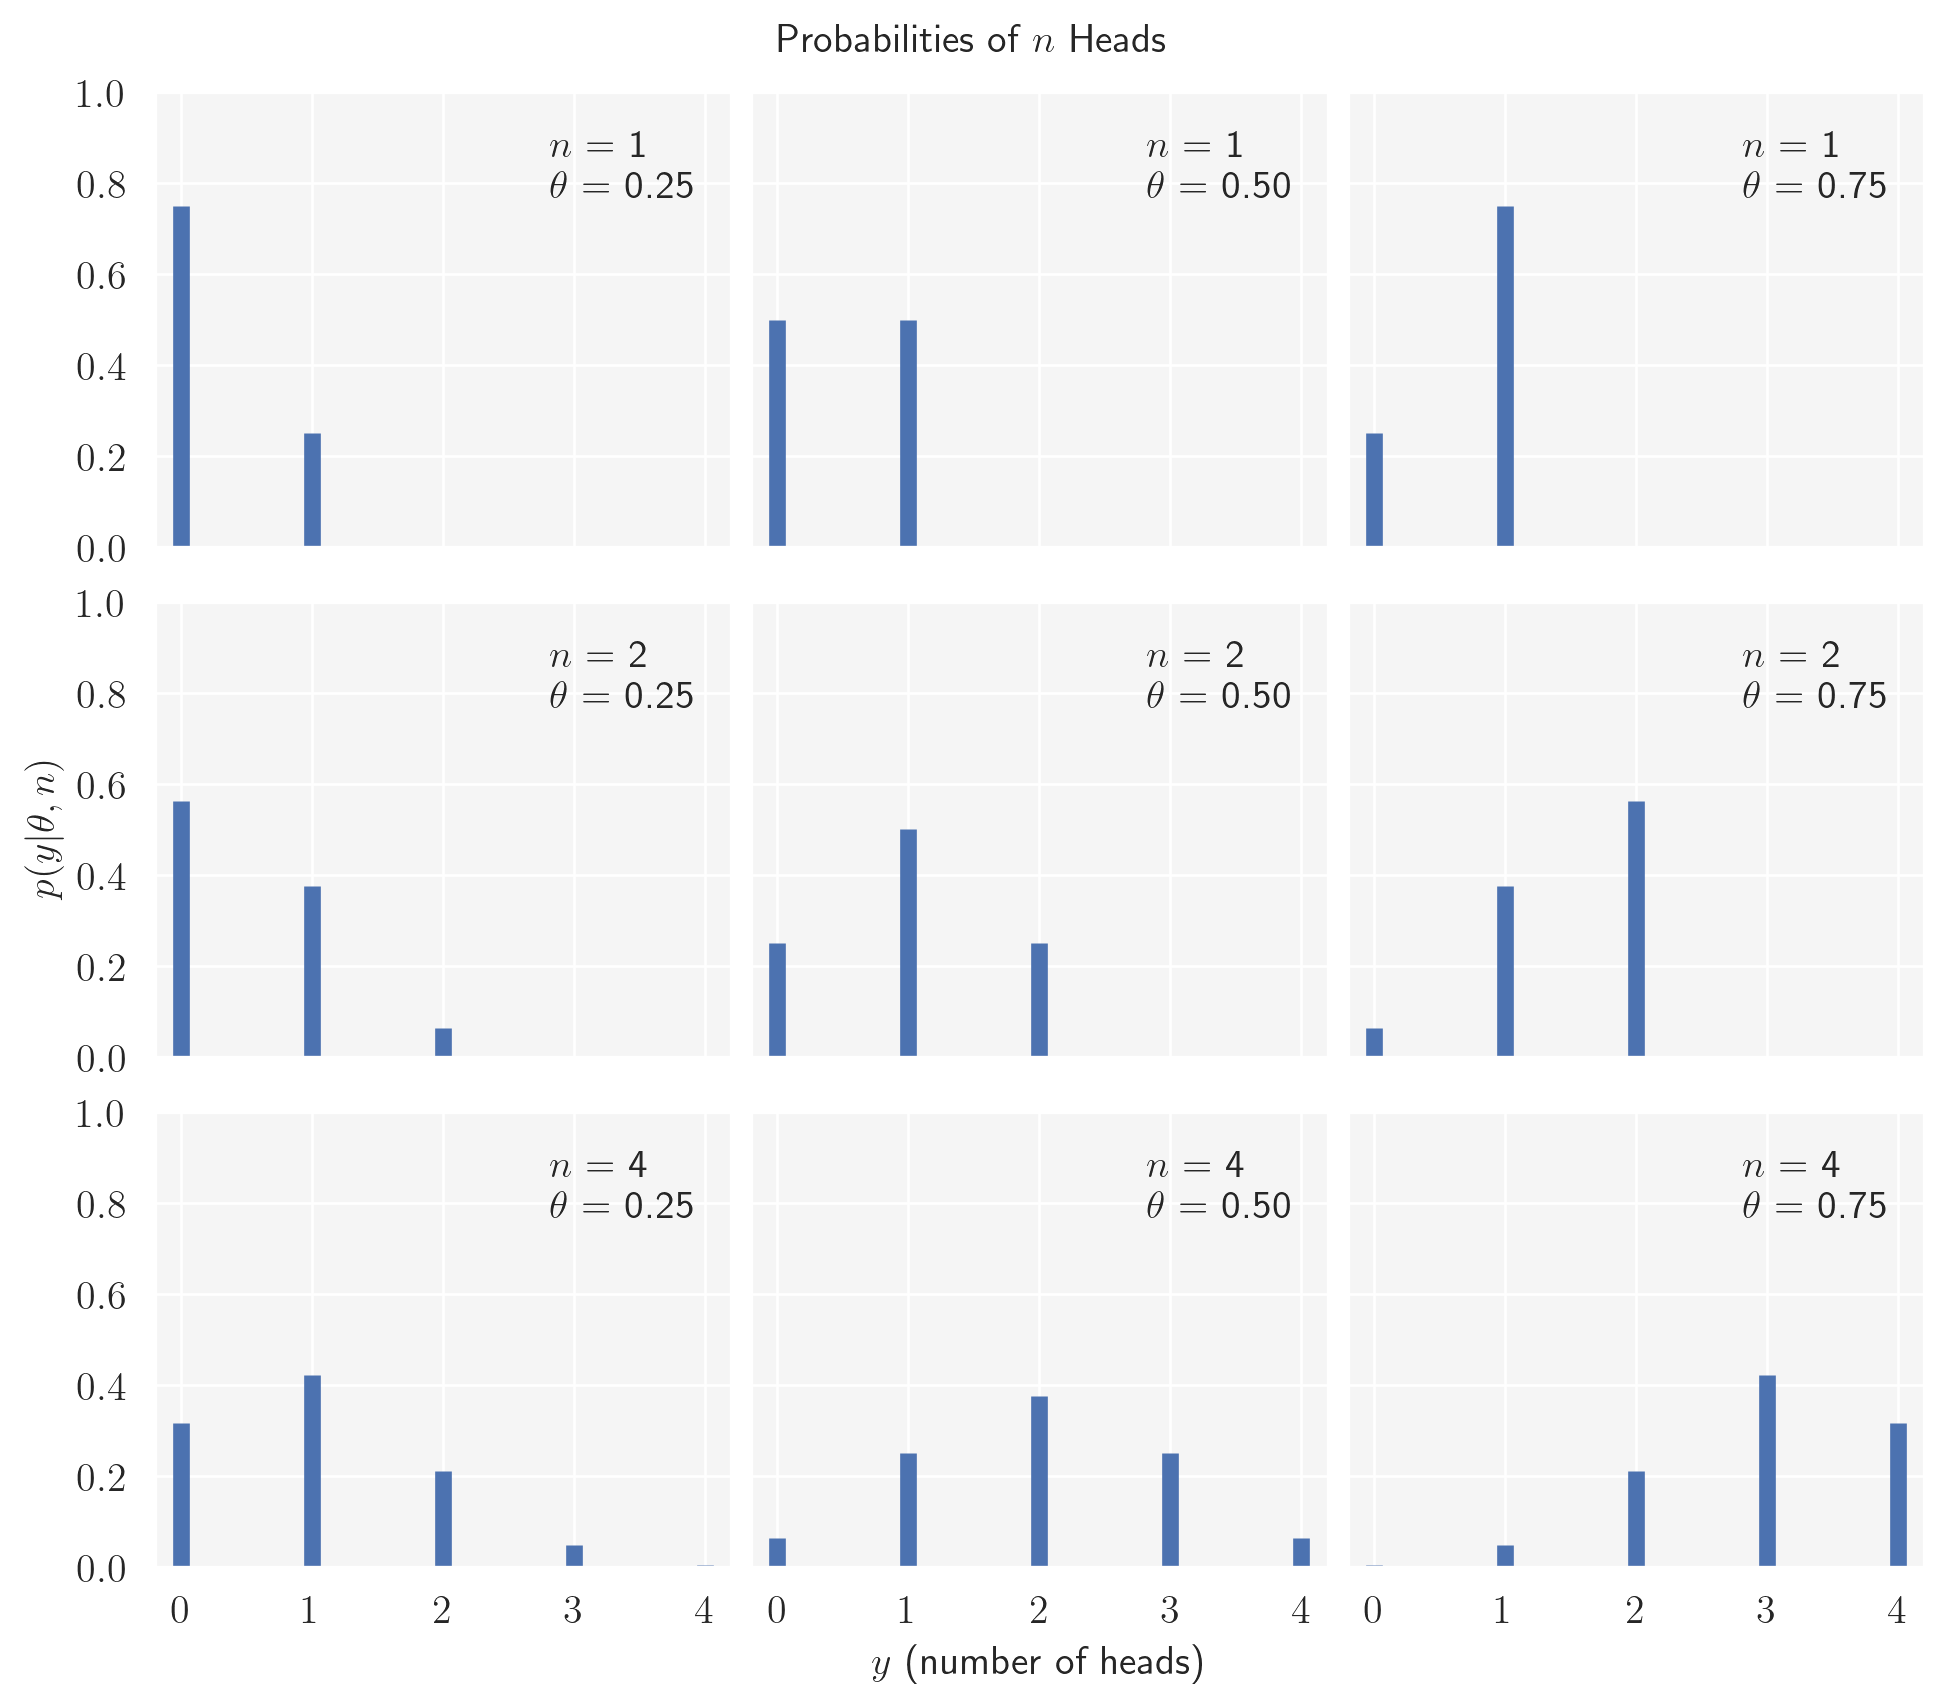

In [3]:
n_params = [1, 2, 4]  # Number of trials
p_params = [0.25, 0.5, 0.75]  # Probability of success

x = np.arange(0, max(n_params) + 1)
fig, ax = plt.subplots(len(n_params),
                     len(p_params),
                     sharex=True,
                     sharey=True,
                     figsize=(8, 7),
                     constrained_layout=True,
                     #tight_layout=True,
                     dpi=120)



for i in range(len(n_params)):
    for j in range(len(p_params)):
        n = n_params[i]
        p = p_params[j]

        y = stats.binom(n=n, p=p).pmf(x)

        ax[i, j].vlines(x, 0, y, colors='C0', lw=5)
        ax[i, j].set_ylim(0, 1)
        ax[i, j].plot(0, 0,
                      label=f"$n$ = {n}\n $\\theta$ = {p:.2f}",
                      alpha=0)
        ax[i, j].legend(loc="upper right", frameon=False)

        ax[2, 1].set_xlabel('$y$ (number of heads)')
        ax[1, 0].set_ylabel('$p(y | \\theta, n)$')
        ax[0, 0].set_xticks(x)

fig.suptitle("Probabilities of $n$ Heads")
plt.show()
figcaption(
    "Nine binomial distributions; each subplot has its own legend \
    indicating the values of the parameters. Notice that we will get \
    1 if we sum the high of all bars in a subplot. For discrete distributions, \
    the height of the bars represents actual probabilities."
)

The binomial distribution is a reasonable choice for the likelihood. From the figure above, we see that $\theta$ indicates how likely it is to obtain a head when tossing a coin.

### Choosing the Prior <a name="coinprior"></a>

If the value of $\theta$ is known, the binomial distribution tells us the expected distribution of heads. However, we do not know $\theta$. In the Bayesian paradigm, when we do not know the value of a parameter, we put a prior on it. As a prior, we will use a **beta distribution**, which looks as follows: 

<div class="alert alert-block alert-info" style="background-color: white; border: 2px solid; padding: 10px">
    <b><i class="fa fa-pencil" aria-hidden="true"></i>&nbsp; The Beta Distribution</b><br>
<div>

\begin{equation}
    \pi (\theta) = \frac{\Gamma (\alpha + \beta)}{\Gamma (\alpha)\Gamma (\beta)} \theta^{\alpha -1} (1-\theta)^{\beta -1} = \frac{1}{B(\alpha, \beta)} \theta^{\alpha -1} (1-\theta)^{\beta -1},
\end{equation} 
    
where $\alpha>0$ and $\beta>0$ are the shape parameters, and $\Gamma (z)$ is the gamma function. The beta function, 

\begin{equation*}
    B (\alpha, \beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)},
\end{equation*}

is a normalization constant to ensure that the total probability is 1. The beta distribution is defined on the interval $[0, 1]$.    
    
In Bayesian inference, the beta distribution is the conjugate prior probability distribution for the Bernoulli, binomial, negative binomial and geometric distributions.
</div>
</div> 

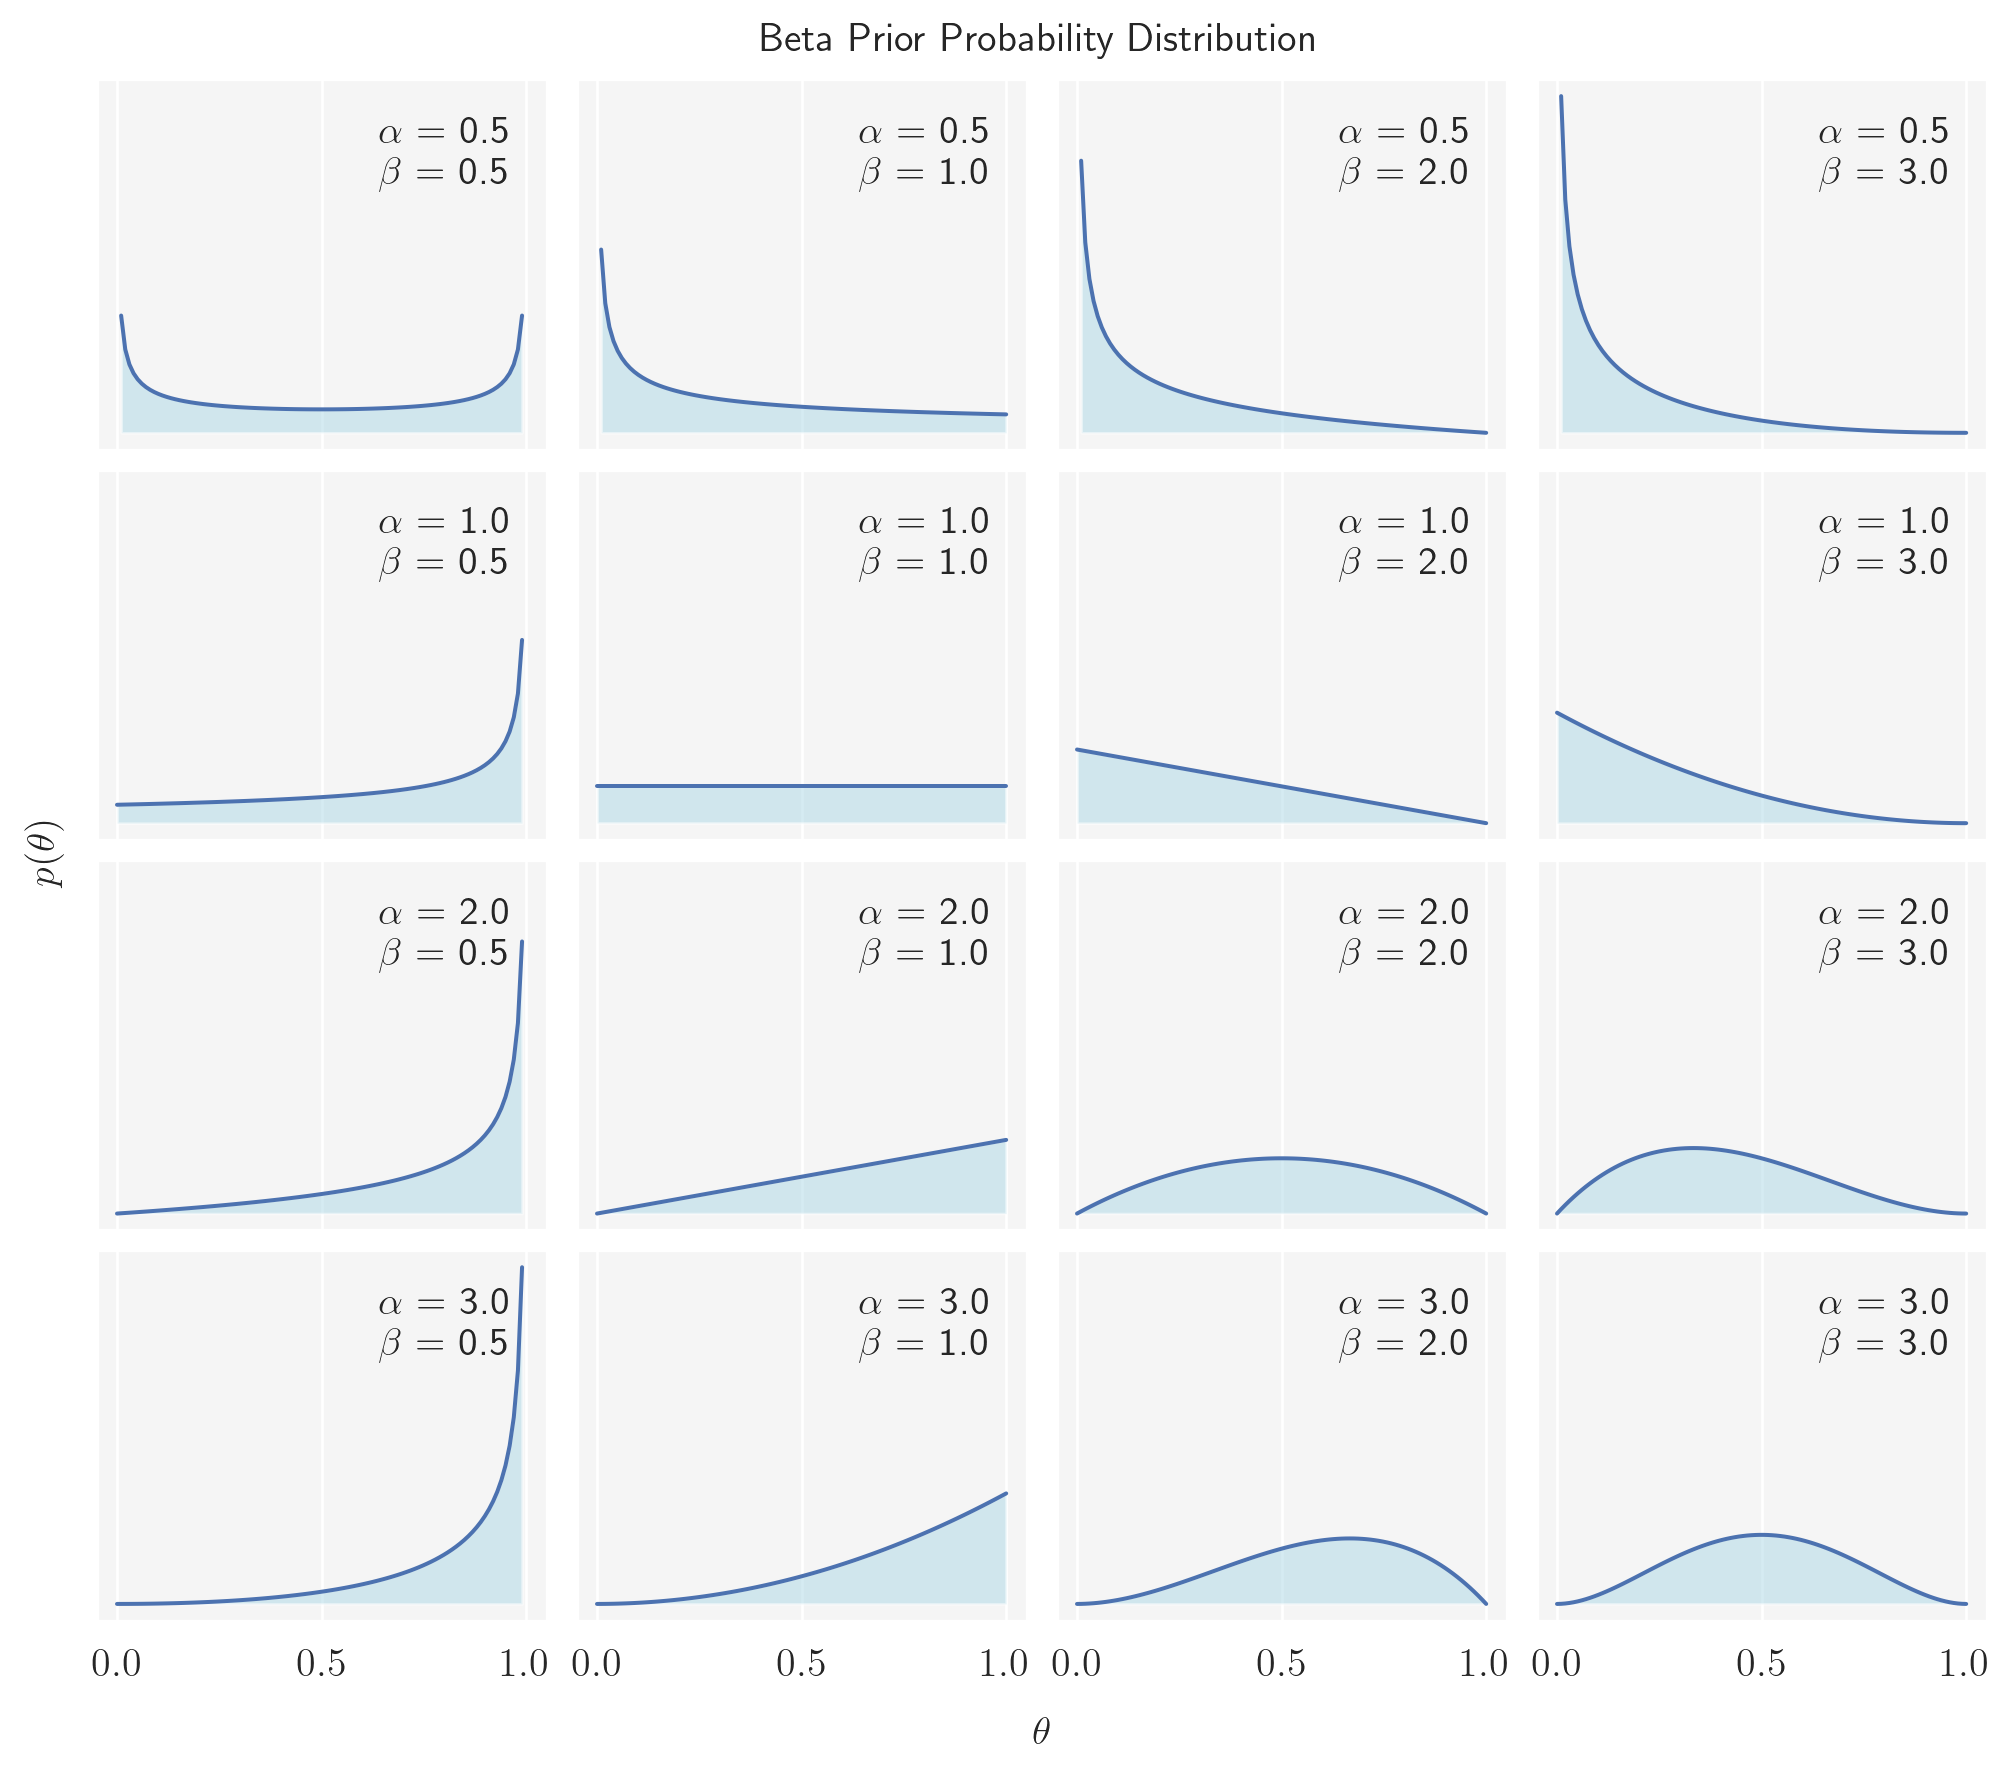

In [4]:
params = [0.5, 1, 2, 3]
x = np.linspace(0, 1, 100)
fig, ax = plt.subplots(
    len(params),
    len(params),
    sharex=True,
    sharey=True,
    figsize=(8, 7),
    constrained_layout=True,
    dpi=120)
for i in range(4):
    for j in range(4):
        a = params[i]
        b = params[j]
        y = stats.beta(a, b).pdf(x)
        ax[i, j].plot(x, y)
        ax[i, j].fill_between(x, y, alpha=0.5, facecolor='lightblue')
        ax[i, j].plot(0,
                      0,
                      label=f"$\\alpha$ = {a:.1f}\n$\\beta$ = {b:.1f}",
                      alpha=0)
        ax[i, j].legend(loc="upper right", frameon=False)

ax[1, 0].set_yticks([])
ax[1, 0].set_xticks([0, 0.5, 1])
fig.text(0.5, -0.03, r'$\theta$', size=12, ha='center')
fig.text(-0.03, 0.5, r'$p(\theta)$', size=12, va='center', rotation=90)
fig.suptitle(r"Beta Prior Probability Distribution")
plt.show()
figcaption(
    r"The beta prior probability distribution, $p(\theta) \sim \mathrm{Beta}(\alpha,\beta)$, with different parameterizations by the two positive shape parameters."
)

The preceding figure displays the advantages of the beta distribution; it is restricted to the interval $[0,1]$ and is versatile. The distribution adopts several shapes, determined by the shape parameters, including the uniform distribution with $\alpha = \beta = 1$. Though, the major advantage of the beta distribution is that it is conjugate prior of the likelihood, which means that when the prior is used in combination with the likelihood it returns a posterior with the same functional form as the prior. Hence, conjugacy ensures mathematical tractability of the posterior. Since the beta distribution is the conjugate prior of the binomial distribution, we will get a beta distribution as the posterior distribution.

### Getting the Posterior <a name="coinposterior"></a>

Bayes' theorem states that the posterior is proportional to the product of the likelihood and the prior. Thus, for our problem the posterior density for $\theta$ is given as: 

\begin{equation*}
    \pi (\theta \mid y) \propto \binom{n}{y} \theta^y (1-\theta)^{n-y} \frac{1}{B(\alpha, \beta)} \theta^{\alpha-1}(1-\theta)^{\beta -1}
\end{equation*}

With fixed $n$ and $y$, the factor $\binom{n}{y}$ does not depend on the unknown parameter $\theta$, and neither does the beta function $B(\alpha, \beta)$. Thus can both be treated as constants when calculating the posterior distribution of $\theta$. Accordingly, we can write:

\begin{equation*}
    \pi (\theta \mid y) \propto \theta^y (1-\theta)^{n-y} \theta^{\alpha-1}(1-\theta)^{\beta -1}
\end{equation*}

Reordering, we obtain: 

\begin{equation*}
    \pi (\theta \mid y) \propto \theta^{\alpha + y -1} (1-\theta)^{\beta + n-y -1},
\end{equation*}

or, more concisely:

\begin{equation}
    \pi (\theta \mid y) \propto \theta^{\alpha' -1} (1-\theta)^{\beta' -1},
\end{equation}

with $\alpha'=\alpha+y$ and $\beta' = \beta + n - y$. We recognize that the expression above has the same functional form as the unnormalized beta distribution: 

\begin{equation}
    \theta \mid y \sim \mathrm{Beta}(\alpha',\beta')
\end{equation}


As is typical in many examples, the posterior density can be written immediately in closed form, up to a constant of proportionality [[2, p. 30]](#references).

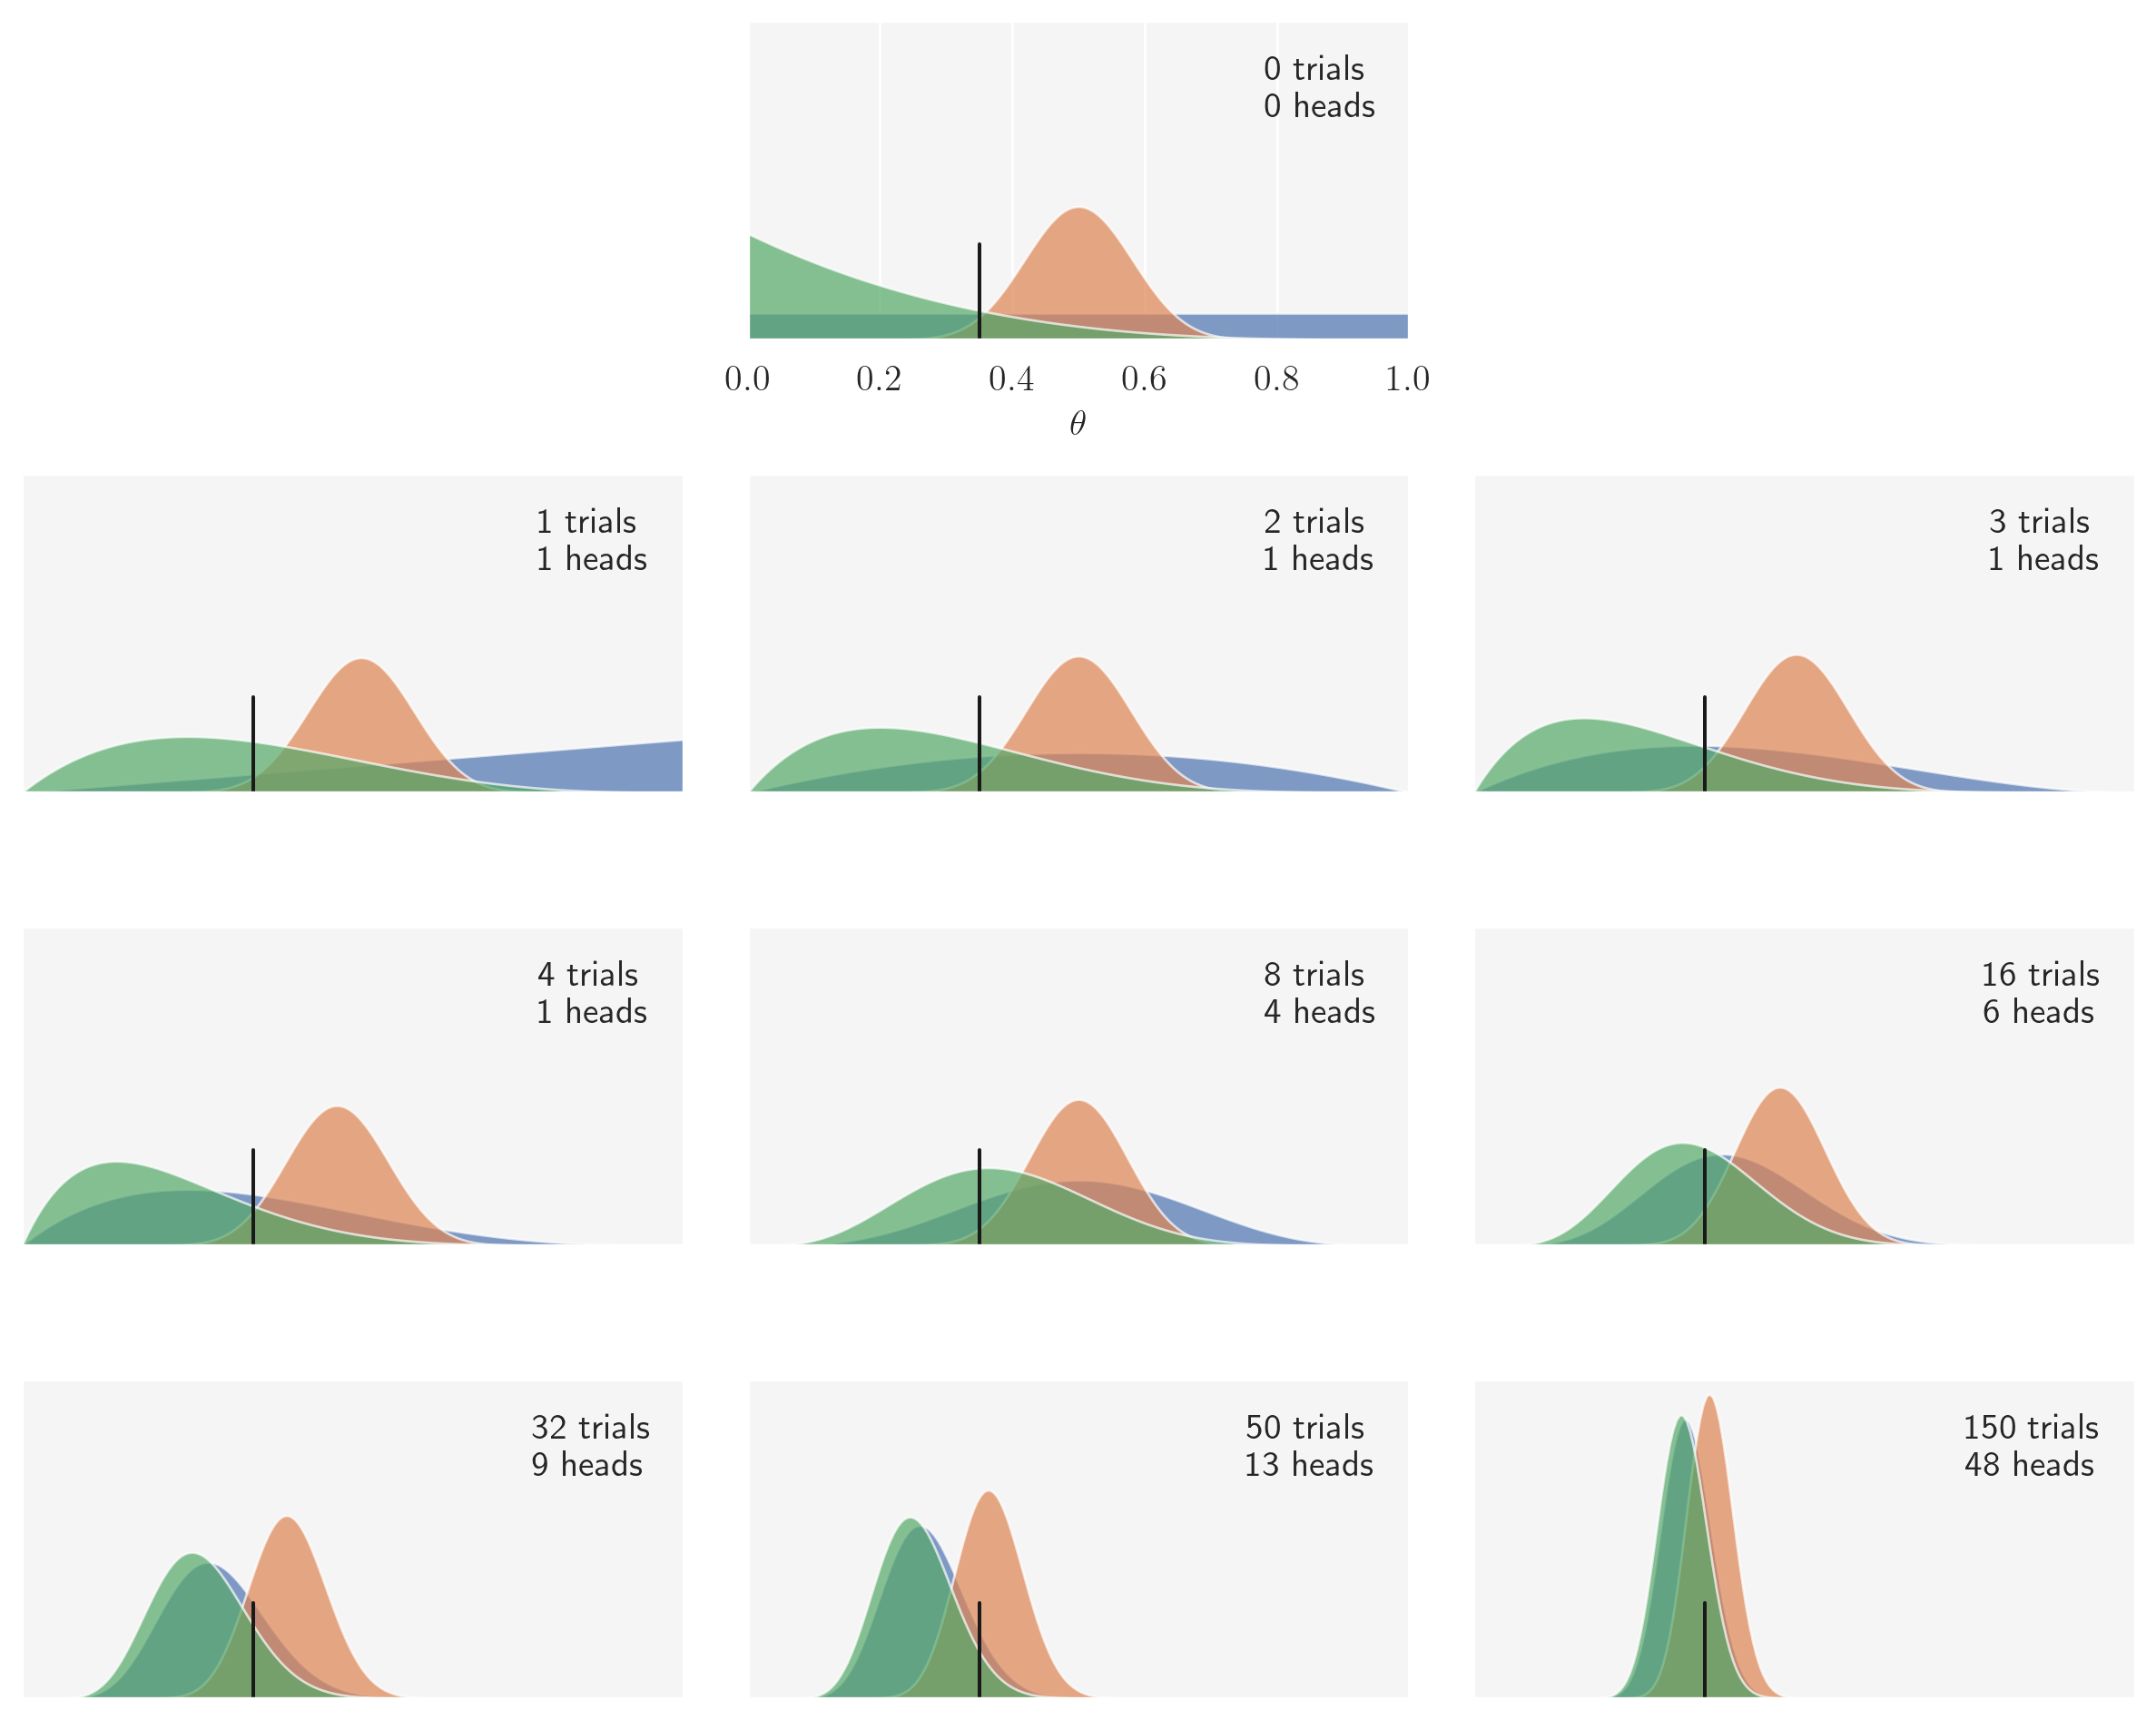

In [5]:
plt.figure(figsize=(10, 8), constrained_layout=True, dpi=120)

n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
theta_real = 0.35

beta_params = [(1, 1), (20, 20), (1, 4)]
dist = stats.beta
x = np.linspace(0, 1, 200)

for idx, N in enumerate(n_trials):
    if idx == 0:
        plt.subplot(4, 3, 2)
        plt.xlabel(r'$\theta$')
    else:
        plt.subplot(4, 3, idx+3)
        plt.xticks([])
    y = data[idx]
    for (a_prior, b_prior) in beta_params:
        p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N - y)
        plt.fill_between(x, 0, p_theta_given_y, alpha=0.7)

    plt.axvline(theta_real, ymax=0.3, color='k')
    plt.plot(0, 0, label=f'{N:4d} trials\n{y:4d} heads', alpha=0)
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.legend(frameon=False)
    plt.yticks([])
plt.tight_layout()
plt.show()

**TODO:** 

* Label prior dist. in the first subplot panel 
* Write down some observations

https://www.analyticsvidhya.com/blog/2016/06/bayesian-statistics-beginners-simple-english/

https://github.com/aloctavodia/BAP/blob/master/code/Chp1/01%20Thinking%20Probabilistically.ipynb

## Gaussian with Unknown Standard Deviation

Normal Distribution with Known Mean and Unknown Standard Deviation

Let the problem be to infer the unknown standard deviation $\sigma$ of a zero-mean Normal distribution. 

<div class="alert alert-block alert-info" style="background-color: white; border: 2px solid; padding: 10px">
    <b><i class="fa fa-exclamation-circle" aria-hidden="true"></i>&nbsp; Note</b><br>
    <p style="color: black">
        In many texts, it is common to see the Normal distribution expressed in terms of the variance and not the standard deviation. We are, however, choosing to parameterize the Normal distribution using the standard deviation, first because it is easier to interpret, and second because this is how the standard Python packages (Numpy, Scipy, etc.) work. 
    </p>
<div>
</div>
</div>


Let the observed data be generated by the 

Likelihood: 

$$p (y | \sigma^2) \sim \mathrm{N}(\mu=0, \sigma^2)$$

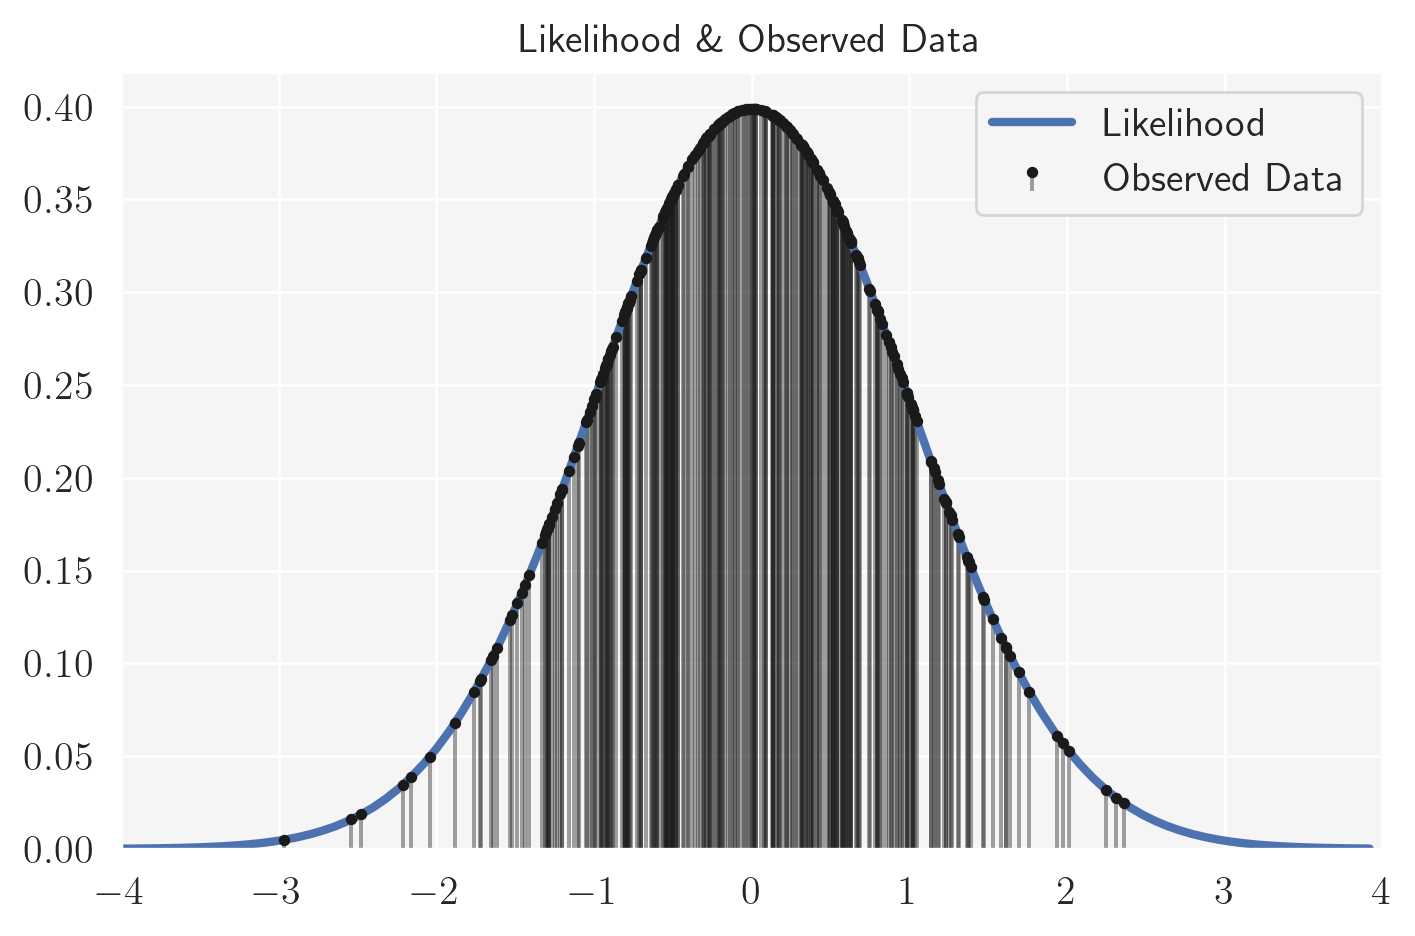

In [6]:
N_obs = 300

sigma_true = 1.
likelihood = stats.norm(loc=0., scale=sigma_true)

(dmin, dmax) = (-4, 4)
obs_data = likelihood.rvs(size=N_obs)
lh_data = likelihood.pdf(obs_data)
x_arr = np.arange(dmin, dmax, (dmax - dmin) / 100.)
f_arr = likelihood.pdf(x_arr)

fig = plt.figure(figsize=(6, 4), tight_layout=True, dpi=120)
plt.xlim([dmin, dmax])
plt.plot(x_arr, f_arr, lw=2.5, label=r"Likelihood")
markerline, stemlines, baseline = plt.stem(obs_data,
                                           lh_data,
                                           linefmt='-k',
                                           markerfmt='k.',
                                           label=r"Observed Data")
plt.setp(stemlines, alpha=0.4)
baseline.set_visible(False)
plt.title(r"Likelihood \& Observed Data")
plt.legend()
plt.ylim(bottom=0.)
plt.show()

### Prior 

The Inverse Gamma distribution is conjugate prior for the unknown variance of a Gaussian distribution: 

$$\pi \left(\sigma^2 \right) \sim \text{Inv-Gamma}(\alpha, \beta)$$


### Posterior

The posterior is then 

$$p(\sigma^2|y) \sim \text{Inv-Gamma}(\alpha',\beta')$$ 

with

$$
\alpha'=\alpha + \frac{N_\mathrm{samp}}{2} \quad \mathrm{and} \quad \beta'=\beta+\frac{1}{2} \sum_k y_k^2 .
$$

**prior predictive check**

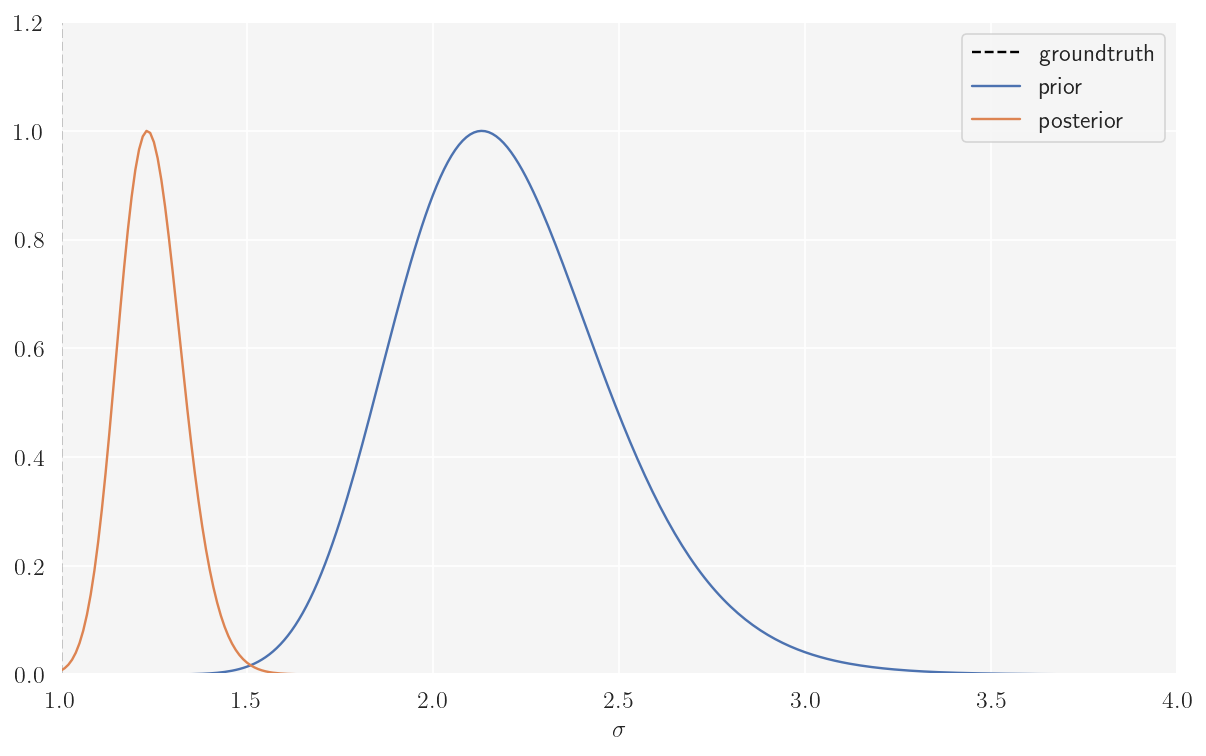

In [7]:
alpha = 60
beta = 130
prior = stats.invgamma(alpha, loc=0, scale=beta)

alphaprime = alpha + N_obs / 2
betaprime = beta + 0.5 * np.sum(obs_data**2)
posterior = stats.invgamma(alphaprime, loc=0, scale=betaprime)

a = 1
b = 4
x = np.arange(a, b, 0.01)

plt.figure(figsize=(10, 6))
plt.xlim([a, b])
plt.xlabel(r"$\sigma$")
plt.ylim([0, 1.2])
plt.plot([sigma_true, sigma_true], [0, 1.2],
         linestyle='--',
         color='black',
         label="groundtruth")
plt.plot(x, prior.pdf(x) / prior.pdf(x).max(), label="prior")
plt.plot(x, posterior.pdf(x) / posterior.pdf(x).max(), label="posterior")
plt.legend()
plt.show()

# Multiparameter Inference

* Bygge opp toy examples: 
    * coin toss (1 parameter) 
    * zero-mean Normal distribution (1 parameter)
    * normalfordelt høyde (2 parametere)

# References <a name="references"></a>

[1] Martin, O. (2018). *Bayesian Analysis with Python*. 2nd. Packt Publishing.

[2] Gelman, A., Carlin, J.B., Stern, H.S., Dunson, D.B., Vehtari, A., & Rubin, D.B. (2014). *Bayesian Data Analysis*. 3rd. Chapman and Hall/CRC. https://doi.org/10.1201/b16018